In [1]:
%pylab inline
import pandas as pd
import torch
from torch.autograd import Variable
import os
from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_hdf('Database/selected_df.h5','table')

In [5]:
list(df)[0]

'AE1 CA OTL CAC PRESS:1649:Bar:Average:900'

(array([  4674.,  16260.,   2066.,   1174.,   1148.,    856.,    963.,
          2766.,    948.,   4185.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

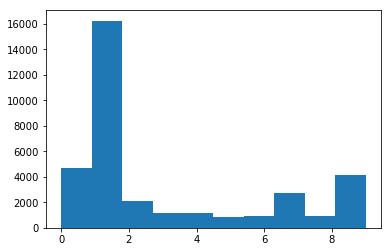

In [152]:
X = np.array(df[list(df)[0]])
X = X.reshape(len(X),1)
kmeans = KMeans(n_clusters=10).fit(X)
kmeans.labels_
plt.hist(kmeans.labels_)

In [144]:
X

array([[-0.01      ],
       [-0.01066667],
       [-0.01733333],
       ..., 
       [-0.02      ],
       [-0.02      ],
       [-0.02      ]])

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

(array([  1175.,  16258.,    948.,   4688.,    963.,   2066.,   2694.,
          1136.,   4256.,    856.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

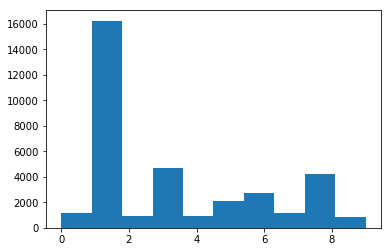

In [70]:

# The dataset is not complete overlapping in time with data from both the mass-flow meters and the
# the rest of the data. So we have to manually filter out the time interval which we are interested in.

date_begin = '2014-05-01'
date_end = '2014-12-01'

df['AE1 FUEL RACK POSIT:1742:mm:Average:900'][date_begin:date_end]



2014-05-01 00:00:00     0.000000
2014-05-01 00:15:00     0.000000
2014-05-01 00:30:00     0.000000
2014-05-01 00:45:00     0.000000
2014-05-01 01:00:00     0.000000
2014-05-01 01:15:00     0.000000
2014-05-01 01:30:00     0.000000
2014-05-01 01:45:00     0.000000
2014-05-01 02:00:00     0.000000
2014-05-01 02:15:00     0.000000
2014-05-01 02:30:00     0.000000
2014-05-01 02:45:00     0.000000
2014-05-01 03:00:00     0.000000
2014-05-01 03:15:00     0.000000
2014-05-01 03:30:00     0.000000
2014-05-01 03:45:00     0.000000
2014-05-01 04:00:00     0.000000
2014-05-01 04:15:00     0.000000
2014-05-01 04:30:00     0.000000
2014-05-01 04:45:00     0.000000
2014-05-01 05:00:00     0.000000
2014-05-01 05:15:00     0.000000
2014-05-01 05:30:00     0.000000
2014-05-01 05:45:00     0.000000
2014-05-01 06:00:00     1.533333
2014-05-01 06:15:00    14.466667
2014-05-01 06:30:00    10.066667
2014-05-01 06:45:00     7.666667
2014-05-01 07:00:00     0.000000
2014-05-01 07:15:00     0.000000
          

In [94]:
# Dict of var names we want to use.


var_names = {'ae1_frp':'AE1 FUEL RACK POSIT:1742:mm:Average:900',
             'ae2_frp':'AE2 FUEL RACK POSIT:2742:mm:Average:900',
             'ae3_frp':'AE3 FUEL RACK POSIT:3742:mm:Average:900',
             'ae4_frp':'AE4 FUEL RACK POSIT:4742:mm:Average:900',
             'me1_frp':'ME1 FUEL RACK POSIT:10005:%:Average:900',
             'me2_frp':'ME2 FUEL RACK POSIT:20005:%:Average:900',
             'me3_frp':'ME3 FUEL RACK POSIT:30005:%:Average:900',
             'me4_frp':'ME4 FUEL RACK POSIT:40005:%:Average:900'}

#Creating the Tensors:

for name_ in var_names:
    globals()[name_] = 3


In [96]:
me1_frp

3

In [90]:

for names in var_names:
    print(var_names[names])

AE1 FUEL RACK POSIT:1742:mm:Average:900
AE2 FUEL RACK POSIT:2742:mm:Average:900
AE3 FUEL RACK POSIT:3742:mm:Average:900
AE4 FUEL RACK POSIT:4742:mm:Average:900
ME1 FUEL RACK POSIT:10005:%:Average:900
ME2 FUEL RACK POSIT:20005:%:Average:900
ME3 FUEL RACK POSIT:30005:%:Average:900
ME4 FUEL RACK POSIT:40005:%:Average:900


In [64]:






ae1_frp = torch.Tensor(df['AE1 FUEL RACK POSIT:1742:mm:Average:900'][date_begin:date_end])
ae2_frp = torch.Tensor(df['AE2 FUEL RACK POSIT:2742:mm:Average:900'][date_begin:date_end])
ae3_frp = torch.Tensor(df['AE3 FUEL RACK POSIT:3742:mm:Average:900'][date_begin:date_end])
ae4_frp = torch.Tensor(df['AE4 FUEL RACK POSIT:4742:mm:Average:900'][date_begin:date_end])

fo1_boost = torch.Tensor(df['FO BOOST 1 CONSUMPT:6165:m3/h:Average:900'][date_begin:date_end])
fo2_boost = torch.Tensor(df['FO BOOST 2 CONSUMPT:6166:m3/h:Average:900'][date_begin:date_end])

#me1_frp = torch.Tensor([df['ME1 FUEL RACK POSIT:10005:%:Average:900'],df['ME2 FUEL RACK POSIT:20005:%:Average:900']])

me1_frp = torch.Tensor(df['ME1 FUEL RACK POSIT:10005:%:Average:900'][date_begin:date_end])
me2_frp = torch.Tensor(df['ME2 FUEL RACK POSIT:20005:%:Average:900'])
me3_frp = torch.Tensor(df['ME3 FUEL RACK POSIT:30005:%:Average:900'])
me4_frp = torch.Tensor(df['ME4 FUEL RACK POSIT:40005:%:Average:900'])

fo_1_3_total = torch.Tensor(df['FO_day_engine_1_3'])
fo_2_4_total = torch.Tensor(df['FO_day_engine_2_4'])

#Adding weight variables

w_ae1 = Variable(torch.ones(len(ae1_frp)), requires_grad = True)
w_ae2 = Variable(torch.ones(len(ae2_frp)), requires_grad = True)
w_ae3 = Variable(torch.ones(len(ae3_frp)), requires_grad = True)
w_ae4 = Variable(torch.ones(len(ae4_frp)), requires_grad = True)

w_me1 = Variable(torch.ones(len(me1_frp)), requires_grad = True)
w_me2 = Variable(torch.ones(len(me2_frp)), requires_grad = True)
w_me3 = Variable(torch.ones(len(me3_frp)), requires_grad = True)
w_me4 = Variable(torch.ones(len(me4_frp)), requires_grad = True)






In [65]:
fo_1_3_total


     nan
     nan
     nan
   ⋮    
  8.8400
  8.8400
  8.8400
[torch.FloatTensor of size 35040]

In [63]:
# Buildning a cost function

cost = 



Variable containing:
 1
 1
 1
⋮ 
 1
 1
 1
[torch.FloatTensor of size 35040]

In [55]:
#w_ae1 = Variable(torch.ones(100))
w_ae1

Variable containing:
 1  1
[torch.FloatTensor of size 1x2]

In [20]:
b


  0.0000
  0.0000
  0.0000
   ⋮    
 49.9281
 48.9667
 49.6771
[torch.FloatTensor of size 35040]